In [65]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = datasets.load_diabetes(as_frame=True)

In [6]:
df = data.frame

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [16]:
def remove_outliers_IQR(df: pd.DataFrame, numerical_columns: list) -> pd.DataFrame:
    
    
    for col in numerical_columns:
        
        Q1:float = df[col].quantile(0.25)  # первый квартиль
        Q3:float = df[col].quantile(0.75)  # третий квартиль
        IQR:float = Q3 - Q1  # межквартильный размах
        lower_bound:float = Q1 - 1.5 * IQR  # нижняя граница для выбросов
        upper_bound:float = Q3 + 1.5 * IQR  # верхняя граница для выбросов
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # удаляем выбросы

        # Заменяем выбросы на NaN (а надо ли)
        df[col] = df.apply(lambda x: x[col] if (x[col] >= lower_bound) and (x[col] <= upper_bound) else np.nan, axis=1)
        
    return df

In [25]:
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [26]:
df_filter = remove_outliers_IQR(df, num_columns)

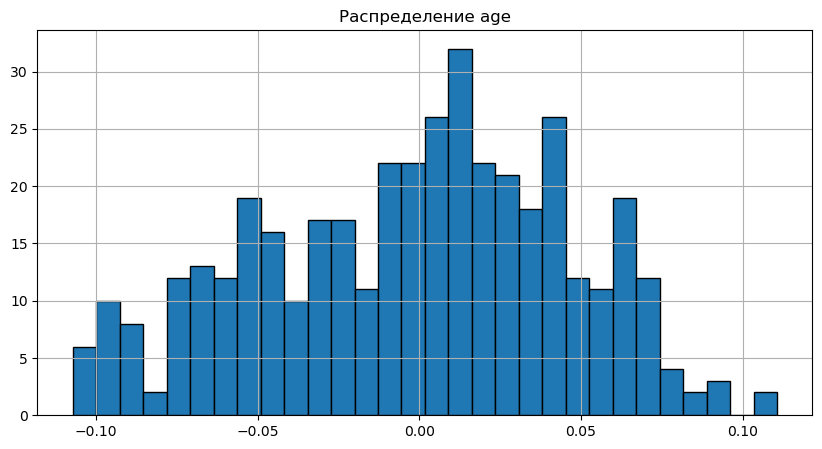

In [27]:
df_filter['age'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.title('Распределение age')
plt.show()

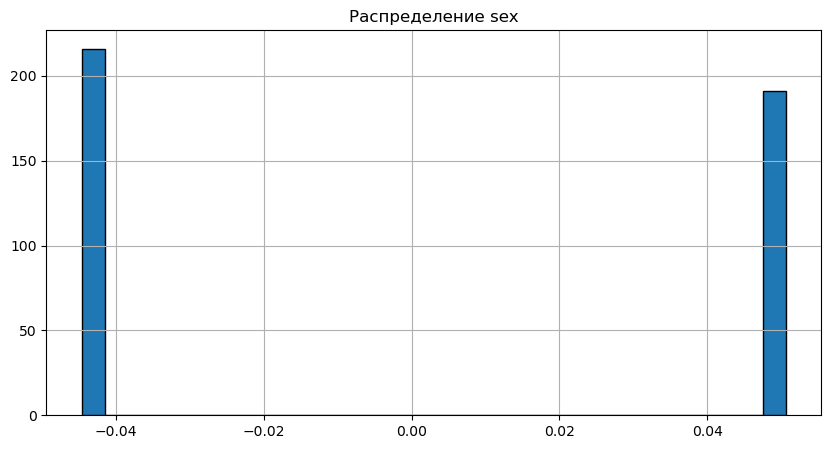

In [28]:
df_filter['sex'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.title('Распределение sex')
plt.show()

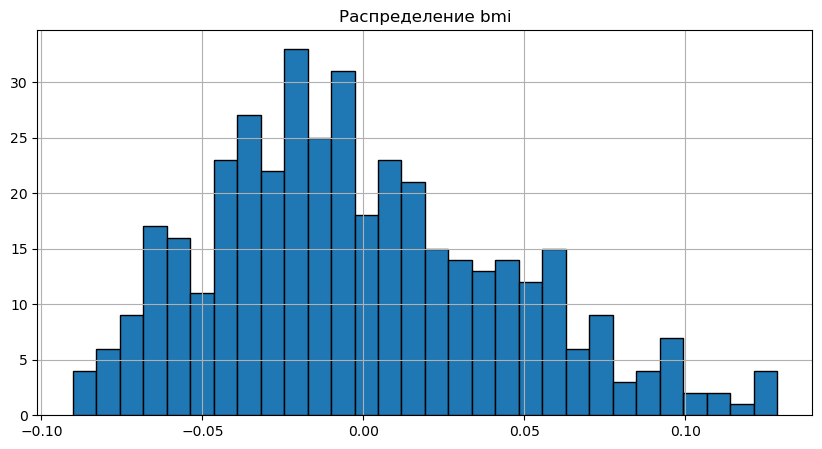

In [29]:
df_filter['bmi'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.title('Распределение bmi')
plt.show()

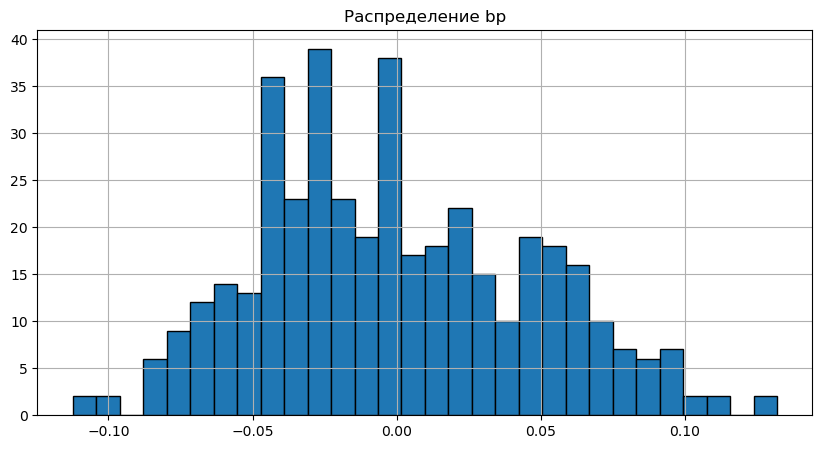

In [30]:
df_filter['bp'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.title('Распределение bp')
plt.show()

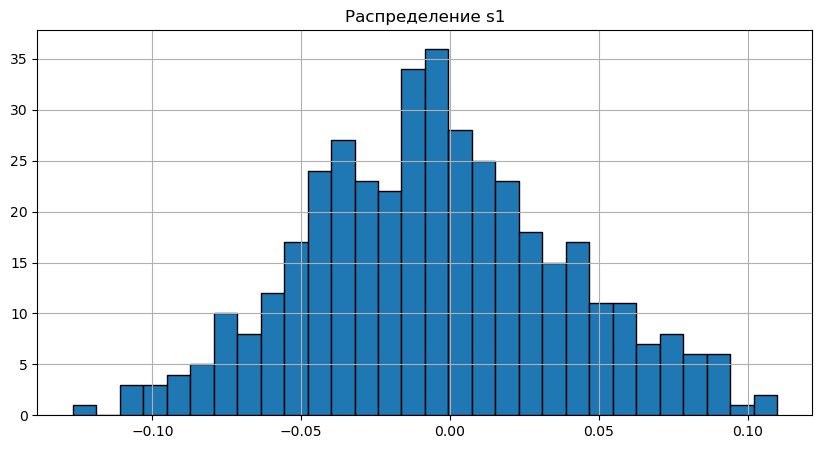

In [31]:
df_filter['s1'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.title('Распределение s1')
plt.show()

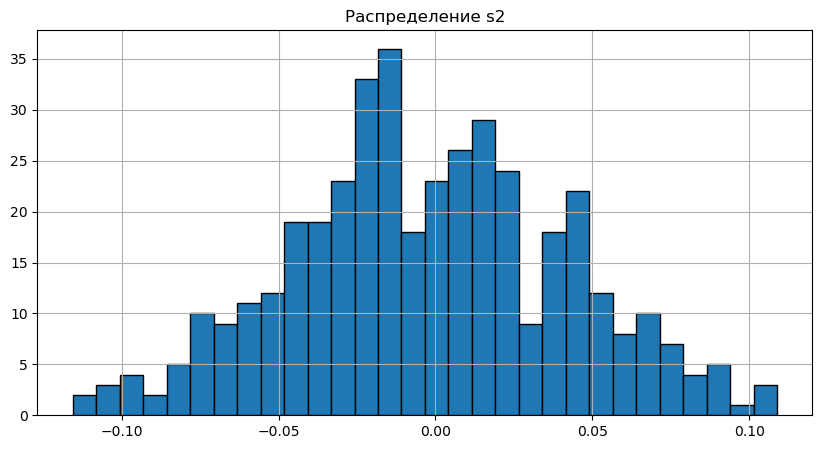

In [32]:
df_filter['s2'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.title('Распределение s2')
plt.show()

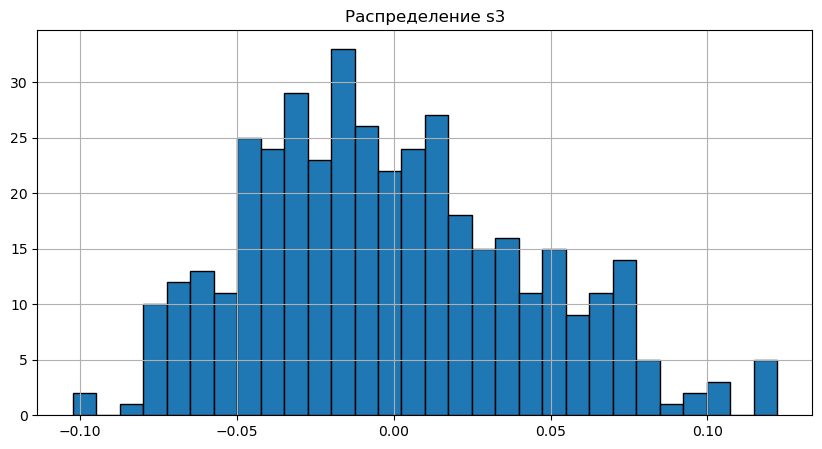

In [33]:
df_filter['s3'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.title('Распределение s3')
plt.show()

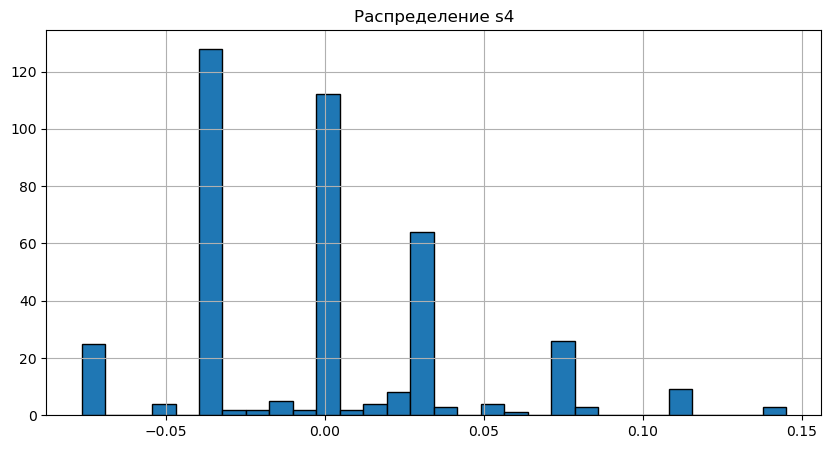

In [34]:
df_filter['s4'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.title('Распределение s4')
plt.show()

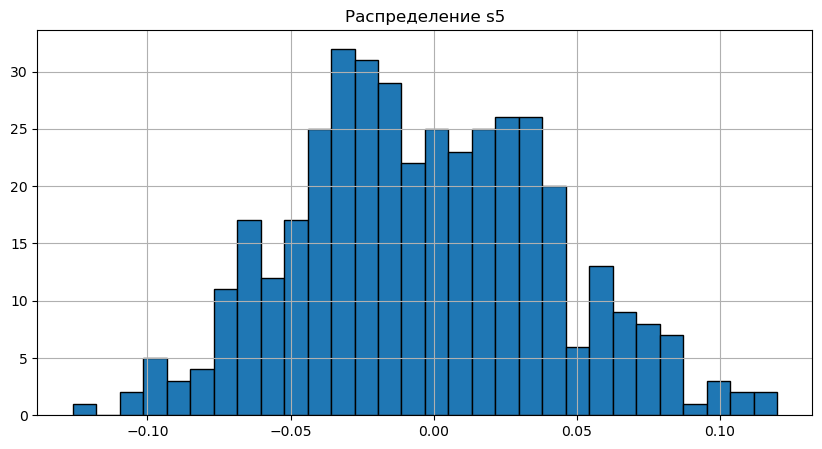

In [35]:
df_filter['s5'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.title('Распределение s5')
plt.show()

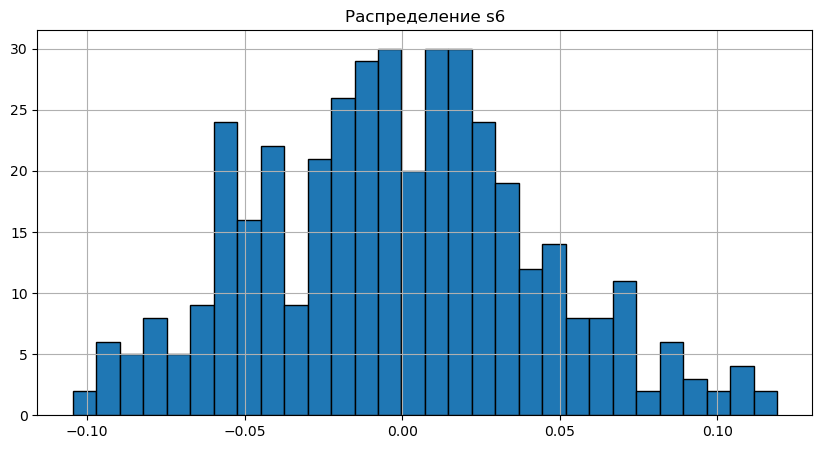

In [36]:
df_filter['s6'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.title('Распределение s6')
plt.show()

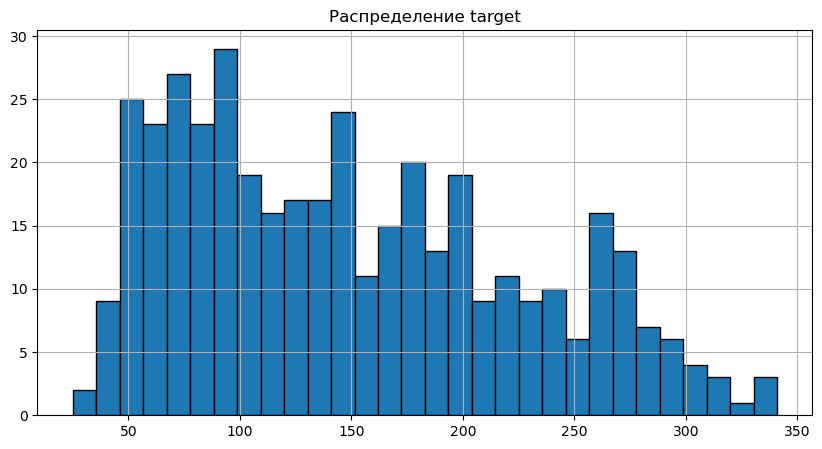

In [37]:
df_filter['target'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.title('Распределение target')
plt.show()

In [38]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


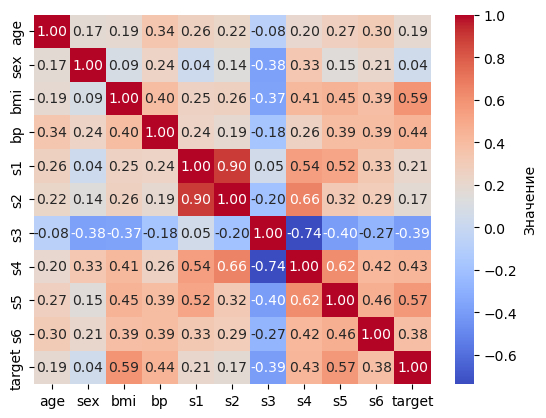

In [42]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Значение'})
plt.show()

Пол исключаем, тк корреляция по нему слишком низкая.
В качкстве целевого столбца (y) выбираем  target

In [47]:
def line_regretion(X, y, step = 0.1, step_dec = 0.01, iteration = 1000):
    sample, fitches = X.shape
    w = np.zeros(fitches)
    b = 0
    mse_hist = []
    
    for i in range(1, iteration + 1):
        y_prediction = np.dot(X, w) + b
        error = y_prediction - y
        mse = np.mean(error**2)
        mse_hist.append(mse)
        
        dw = (2 / sample) * np.dot(X.T, error)  # Градиент по w
        db = (2 / sample) * np.sum(error)       # Градиент по b
        
        step_new = step / (1 + step_dec)
        w -= dw * step_new
        b -= db * step_new
        
    return w, b, mse_hist
    

In [44]:
y = df['target'].values
X = df.drop(columns = ['target']).values


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
result_w, result_b, mse_result = line_regretion(X, y)

In [46]:
print(f'Веса модели w: {result_w}')
print(f'Смещение: {result_b}')

Веса модели w: [  48.23545668  -32.31519327  257.40421375  179.86110668   36.44058286
   11.16121019 -147.65123544  133.53830317  228.32422783  128.13448292]
Смещение: 152.1334841628959


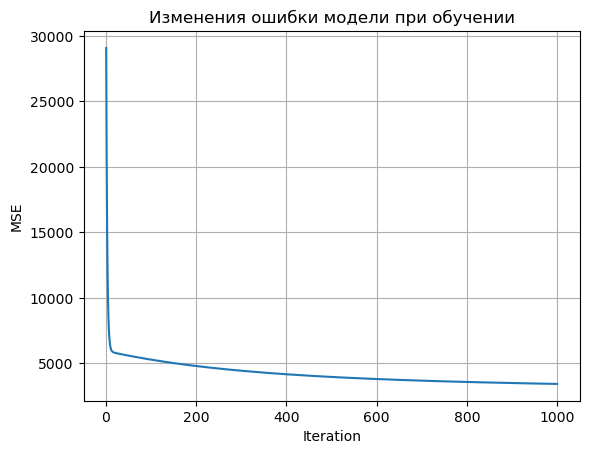

In [49]:
plt.plot(range(1, len(mse_result) + 1), mse_result)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Изменения ошибки модели при обучении')
plt.grid()
plt.show()

In [50]:
result1_w, result1_b, mse_result1 = line_regretion(X, y, iteration = 10000)

In [51]:
print(f'Веса модели w: {result1_w}')
print(f'Смещение: {result1_b}')

Веса модели w: [  -5.32314822 -233.64399102  524.25544377  319.67137339  -61.21611789
 -116.58566026 -207.1416368   119.20860969  454.73359783   85.25777943]
Смещение: 152.13348416289597


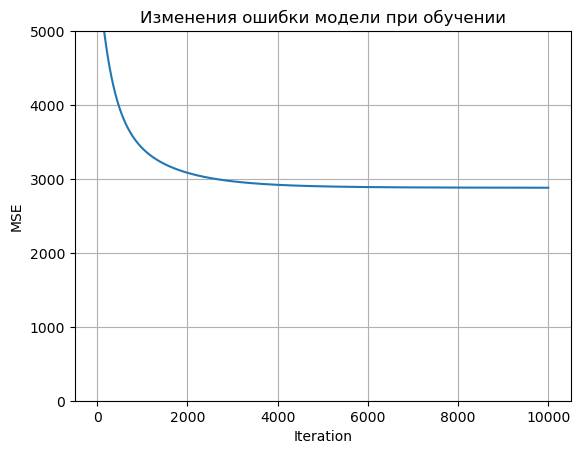

In [53]:
plt.plot(range(1, len(mse_result1) + 1), mse_result1)
plt.xlabel('Iteration')
plt.ylim(0, 5000)
plt.ylabel('MSE')
plt.title('Изменения ошибки модели при обучении')
plt.grid()
plt.show()

In [58]:
y_bmi = df['target'].values
X_bmi = df[['bmi', 's5']].values

In [62]:
result2_w, result2_b, mse_result2 = line_regretion(X_bmi, y_bmi, iteration = 10000, step_dec = 0.001)

In [63]:
print(f'Веса модели w: {result2_w}')
print(f'Смещение: {result2_b}')

Веса модели w: [671.68102636 616.47546789]
Смещение: 152.13348416289597


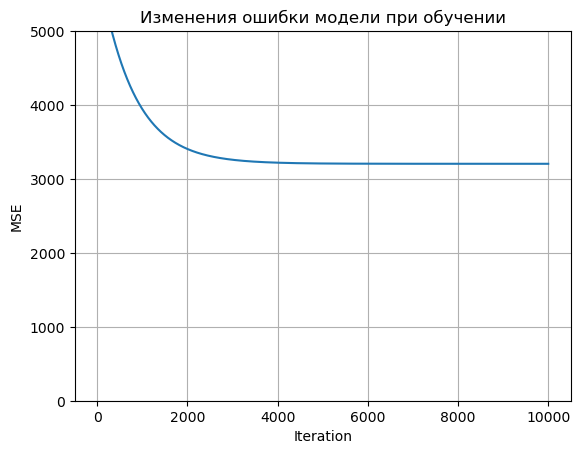

In [64]:
plt.plot(range(1, len(mse_result2) + 1), mse_result2)
plt.xlabel('Iteration')
plt.ylim(0, 5000)
plt.ylabel('MSE')
plt.title('Изменения ошибки модели при обучении')
plt.grid()
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
